In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix)

In [4]:
df = pd.read_csv("customers.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
y = df['Channel']   # Target variable 
X = df.drop('Channel',axis=1)

In [10]:
# encode vatetgorical variable if any
X = pd.get_dummies(X, drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [14]:
# feature scaling ( it is very imp for KNN)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# train the KNN model
knn = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [16]:
# make preditions
y_pred = knn.predict(X_test_scaled)

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[57  3]
 [ 5 23]]


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.95      0.93        60
           2       0.88      0.82      0.85        28

    accuracy                           0.91        88
   macro avg       0.90      0.89      0.89        88
weighted avg       0.91      0.91      0.91        88



In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


In [20]:
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rates.append(np.mean(pred_k != y_test))

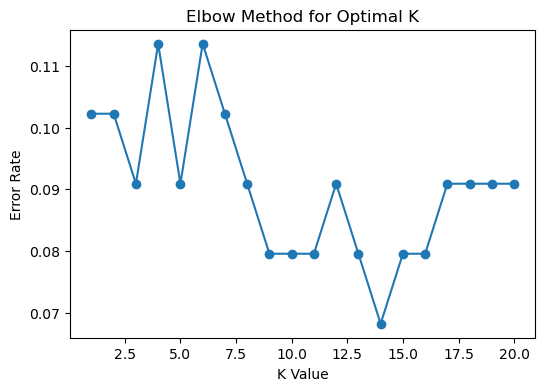

In [21]:
plt.figure(figsize=(6,4))
plt.plot(range(1,21), error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K")
plt.show()